## Zaawansowane Metody Uczenia Maszynowego - PROJEKT 1 

Temat projektu: **Klasyfikator pokemonów** 

<img src="./assets/charizard_cool.png" width="50" height="50" />

---
### Zajęcia numer 1 - lista zadań:
1. Wybrać zbiór danych, skonsultować, wpisać w arkusz na Delcie
2. Opisać co w nim jest: jakie mamy cechy, czego dotyczy i co będzie przedmiotem projektu (regresja/klasyfikacja, zmianna zależna etc.)
4. Zbiór danych ma cechować się:
- Regresja lub klasyfikacja
- Ilość danych min 1k rekordów
- 10% danych brakujących (lub błędnych, mozna dodać ręcznie)
- Min 5-7 lub więcej cech w zbiorze
- W przypadku klasyfikacji rozkład ilościowy etykiet
  
4. Podsumowanie zbioru, opis cech, ilości danych, analiza danych błędnych/brakujących (czy są/nie ma etc.)
5. Histogramy + opis
6. Box ploty + opis
7. Wizualizacja danych w oparciu o jakiś bardziej zaawansowany wykres (przykład z wykładu)
8. Analiza danych bazując na pandas (np. w jakim kraju wystąpiła najwyższa inflacja, w jakim kraju najczęściej pojawił się kryzys itp)
9. Analiza pairplotów (jeśli dużo danych w zestawie można wyrysować mniej lub osobno dla każdej kolumny albo np. policzyć współczynniki korelacji Pearsona/Spearmana)

---
#### Opis zbioru:
Zbiór danych zawiera informacje o 1045 Pokemonach z Generacji od 1 do 8.
Opisuje atrybuty Pokemonów takie jak: nazwa, typ, ilość zdrowia, siłę ataku, moc obrony, itd.

Kolumny:
- `Pokedex_No.` - numer Pokemona z pokedexu
- `Name` - nazwa Pokemona
- `Type` - typ (każdy z Pokemonów ma od 1 do 2 typów)
- `Other Type` - drugi typ pokemona (każdy z Pokemonów ma od 1 do 2 typów) -> jeżeli None tzn. Pokemon ma tylko 1 typ
- `HP` - ilość zdrowia
- `Attack` - siła ataku
- `Defense` - siła oborny
- `Special Attack` - siła ataku specjalnego
- `Special Defense` - siła obrony specjalne
- `Speed` - szybkość Pokemona
- `Total` - całkowita moc Pokemona (suma HP, Attack, Defense, Special Attack, Special Defense, Speed)
- `Generation` - generacja do której należy
- `Legendary` - zmienna zależna, określa czy Pokemon jest legendarny (0/1)

Model klasyfikacji - model będzie określał czy dany Pokemon jest legendarny czy nie.

Etykiety:
- 0 - pokemon nie jest legendarny
- 1 - pokemon jest legendarny

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [104]:
# wczytanie danych
dataset_path = './dataset/dataset_pokemon_all.csv'
df = pd.read_csv(dataset_path)

In [105]:
df = df.replace("?", "None")

In [106]:
df['Name'] = df['Name'].apply(lambda x : x.replace("'", ""))

In [107]:
df.head()

Pokedex_No           Name   Type Other_Type  HP  Attack  Defense  \
0           1      Bulbasaur  Grass     Poison  45      49       49   
1           2        Ivysaur  Grass     Poison  60      62       63   
2           3       Venusaur  Grass     Poison  80      82       83   
3           3  Mega Venusaur  Grass     Poison  80     100      123   
4           4     Charmander   Fire       None  39      52       43   

   Special_Attack  Special_Defense  Speed  Total  Generation  Legendary  
0              65               65     45    318           1          0  
1              80               80     60    405           1          0  
2             100              100     80    525           1          0  
3             122              120     80    625           1          0  
4              60               50     65    309           1          0

In [108]:
# zakodowanie zmiennej Type oraz OtherType 
# -> frequency encoding - zliczamy wystapienia danej kategorii i zamieniamy ją na wartość liczinka
frequency = df['Type'].value_counts().to_dict()
df['Type'] = df['Type'].map(frequency)
frequency

{'Water': 134,
 'Normal': 115,
 'Grass': 91,
 'Bug': 81,
 'Psychic': 81,
 'Fire': 65,
 'Electric': 62,
 'Rock': 60,
 'Dark': 46,
 'Ghost': 42,
 'Fighting': 42,
 'Poison': 41,
 'Ground': 41,
 'Dragon': 41,
 'Ice': 37,
 'Steel': 36,
 'Fairy': 22,
 'Flying': 8}

In [109]:
frequency = df['Other_Type'].value_counts().to_dict()
df['Other_Type'] = df['Other_Type'].map(frequency)
frequency

{'None': 492,
 'Flying': 112,
 'Fairy': 41,
 'Psychic': 40,
 'Ground': 39,
 'Poison': 38,
 'Steel': 35,
 'Dragon': 32,
 'Fighting': 32,
 'Grass': 28,
 'Dark': 27,
 'Ghost': 26,
 'Ice': 20,
 'Water': 20,
 'Fire': 17,
 'Rock': 15,
 'Normal': 11,
 'Electric': 11,
 'Bug': 9}

In [110]:
df.head()

Pokedex_No           Name  Type  Other_Type  HP  Attack  Defense  \
0           1      Bulbasaur    91          38  45      49       49   
1           2        Ivysaur    91          38  60      62       63   
2           3       Venusaur    91          38  80      82       83   
3           3  Mega Venusaur    91          38  80     100      123   
4           4     Charmander    65         492  39      52       43   

   Special_Attack  Special_Defense  Speed  Total  Generation  Legendary  
0              65               65     45    318           1          0  
1              80               80     60    405           1          0  
2             100              100     80    525           1          0  
3             122              120     80    625           1          0  
4              60               50     65    309           1          0

In [111]:
rows, cols = df.shape

In [112]:
values_count = rows * cols
max_empty = round(0.1 * values_count) + 1
max_empty = max_empty

In [113]:
# uzupełnanie pustymi wartościami
row_idxs = np.random.randint(0, rows, max_empty)
# skip nazwy i indeksu
col_idxs = np.random.randint(2, cols, max_empty)

for r, c in zip(row_idxs, col_idxs):
    df.iat[r, c] = None

#### Podsumowanie zbioru:
- Opis cech - jak wyżej
- **Uwaga** kolumny `Pokedex_No` i `Name` nie będą używane w treningu modelu, ponieważ nie dają nam wartościowych informacji
- Ilość danych - 1045 wierszy
- Dane błędne/brakujące - dodane ręcznie 10%
- Zmienne `Type` oraz `Other_Type` zakodowane przy użyciu `frequency encoding`

In [114]:
df.describe()

Pokedex_No        Type  Other_Type          HP      Attack  \
count  1045.000000  942.000000  927.000000  924.000000  941.000000   
mean    440.769378   74.842887  254.729234   70.269481   80.411265   
std     262.517231   33.651568  224.070562   26.692744   32.118064   
min       1.000000    8.000000    9.000000    1.000000    5.000000   
25%     212.000000   42.000000   35.000000   50.000000   57.000000   
50%     436.000000   65.000000  112.000000   67.000000   78.000000   
75%     670.000000   91.000000  492.000000   84.000000  100.000000   
max     898.000000  134.000000  492.000000  255.000000  185.000000   

          Defense  Special_Attack  Special_Defense       Speed        Total  \
count  926.000000      912.000000       934.000000  927.000000   937.000000   
mean    74.974082       72.880482        72.293362   68.982740   438.614728   
std     31.244621       32.978255        28.131250   30.132066   121.502523   
min      5.000000       10.000000        20.000000    5.000000   175.000000   
25%     52.250000       50.000000        50.000000   45.000000   330.000000   
50%     70.000000       65.000000        70.000000   65.000000   455.000000   
75%     91.750000       95.000000        90.000000   90.000000   510.000000   
max    250.000000      194.000000       250.000000  200.000000  1125.000000   

       Generation   Legendary  
count  909.000000  932.000000  
mean     4.055006    0.122318  
std      2.256476    0.327828  
min      1.000000    0.000000  
25%      2.000000    0.000000  
50%      4.000000    0.000000  
75%      6.000000    0.000000  
max      8.000000    1.000000

In [115]:
df['Legendary'].value_counts(dropna=False)

Legendary
0.0    818
1.0    114
NaN    113
Name: count, dtype: int64

In [116]:
# usunięcie zbędnych kolumn
df = df.drop(columns=['Pokedex_No', 'Name'])

In [117]:
# zapisanie przetworzonoego datasetu do pliku, żeby wczytać cały i nie przetwarzać za każdym razem
df.to_csv('./dataset/dataset_clear.csv', index=False)

In [118]:
df_clear = pd.read_csv('./dataset/dataset_clear.csv')

In [119]:
df_clear.head()

Type  Other_Type    HP  Attack  Defense  Special_Attack  Special_Defense  \
0  91.0        38.0  45.0    49.0     49.0            65.0             65.0   
1  91.0        38.0  60.0    62.0     63.0            80.0             80.0   
2  91.0        38.0  80.0    82.0      NaN           100.0            100.0   
3  91.0        38.0  80.0   100.0    123.0           122.0            120.0   
4  65.0         NaN  39.0    52.0     43.0            60.0             50.0   

   Speed  Total  Generation  Legendary  
0   45.0  318.0         1.0        0.0  
1   60.0  405.0         1.0        0.0  
2   80.0  525.0         1.0        NaN  
3    NaN  625.0         1.0        NaN  
4   65.0  309.0         NaN        NaN

---
#### Histogramy

In [154]:
captions = { 'Type' : 'Typ pokemona', 'Other_Type' : 'Typ podrzędny', 'HP' : 'Punkty zdrowia', 
             'Attack' : 'Punkty ataku', 'Defense' : 'Punkty obrony', 'Special_Attack' : 'Atak specjalny',
             'Special_Defense' : 'Obrona specjalna', 'Speed' : 'Szybkość', 'Total' : 'Wszystkie razem (atak + obrona + prędkość)', 
             'Generation' : 'Generacja', 'Legendary' : 'Legendarność' }

In [134]:
def create_histogram(df, c, cap, save_to_png = False):
    plt.figure(figsize=(8, 6))
    plt.hist(df[c], bins=10, edgecolor='black', alpha=0.7)
    plt.title(f"Histogram: {c}")
    plt.xlabel(cap)
    plt.ylabel("Ilość")
    plt.grid(True)
    if save_to_png:
        plt.savefig('./graphs/histogram/' + col.lower() + '.png', dpi=300, bbox_inches="tight")
    plt.show()
    #df.hist(column=c, figsize=(10, 10))

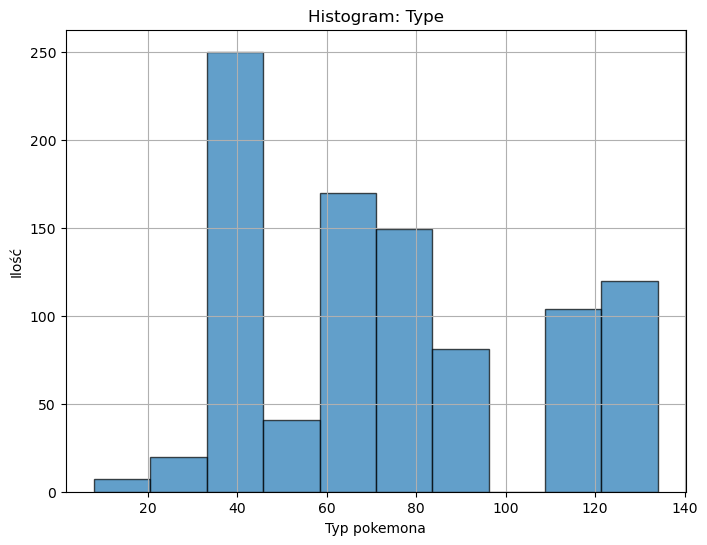

In [143]:
c = 'Type'
create_histogram(df_clear, c, captions[c])

`Type` - najwięcej pokemonów ma typ `40`; na wykresie widać że podział typów nie jest rozkładem normalnym

Może to jednak wynikać ze sposobu kodowania zmiennej kategorycznej (użyty `freqency encoding`), ponieważ niektóre typy pokemonów
występowały tyle samo razy co inne (np. `Poison` oraz `Ground` po 41)

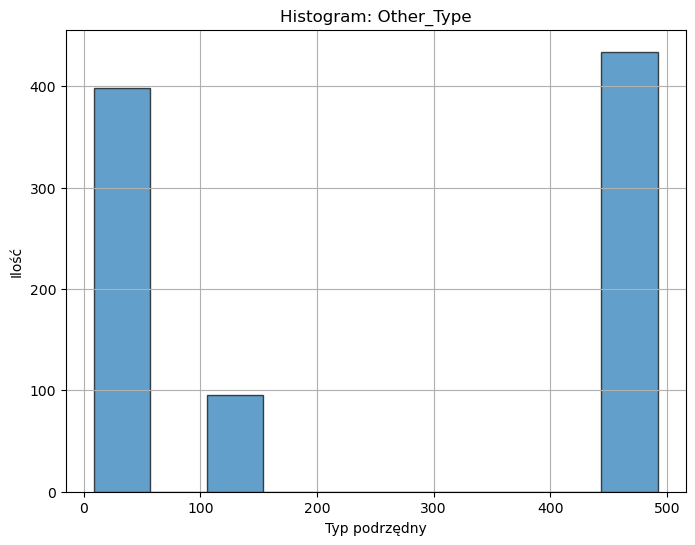

In [144]:
c = 'Other_Type'
create_histogram(df_clear, c, captions[c])

`Other_Type` - najwięcej pokemonów ma drugi typ `492` -> czyli brak podtypu; rozkład jest w tym przypadku bardzo nierówny, nie ma pokemonów o podrzędnym typie między `200` a `400`

Podobnie jak przy zmiennej `Type` trzeba wziąć pod uwagę sposób kodowania zmiennej kategorycznej

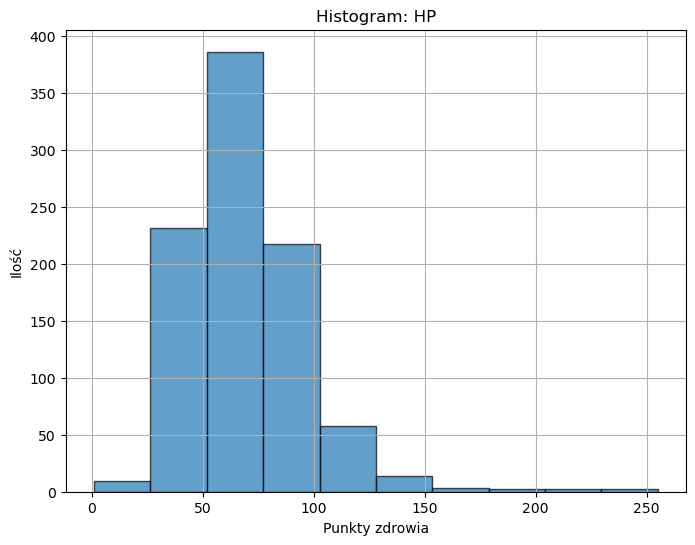

In [145]:
c = 'HP'
create_histogram(df_clear, c, captions[c])

`HP` - najwięcej pokemonów ma między `50` a `100` punktów zdrowia

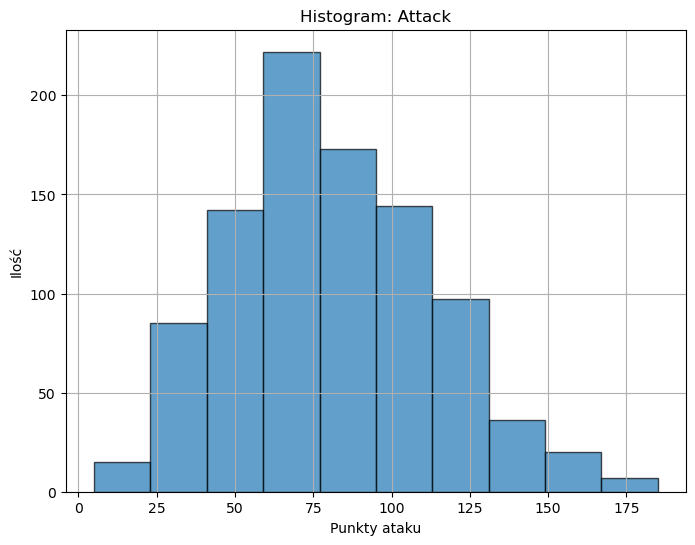

In [146]:
c = 'Attack'
create_histogram(df_clear, c, captions[c])

`Attack` - tutaj rozkład przypomina trochę rozkład normalny; najwięcej pokemonów ma średnią wartość ataku -> `220`

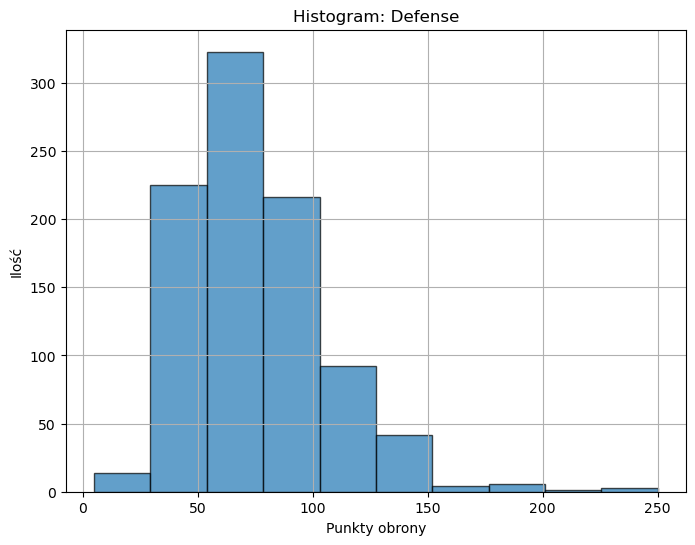

In [148]:
c = 'Defense'
create_histogram(df_clear, c, captions[c])

`Defense` - podobny rozkład co w przypadku `HP`, być może występuje zależność między wartością obrony na ilością punktów życia

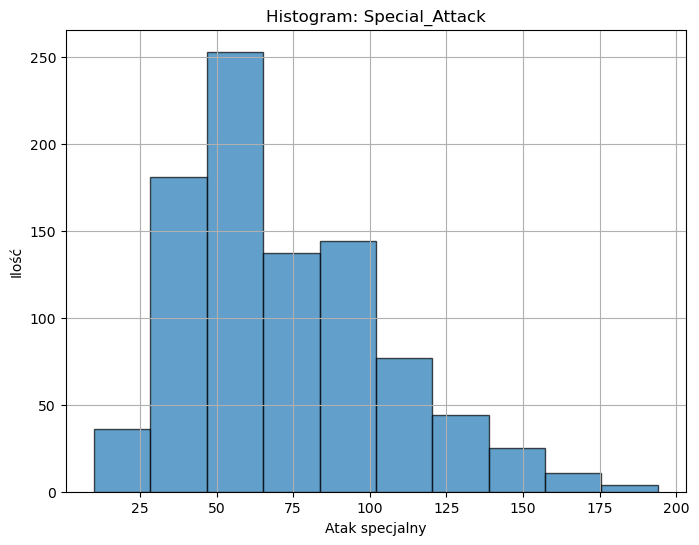

In [149]:
c = 'Special_Attack'
create_histogram(df_clear, c, captions[c])

`Special_Attack` - większość pokemonów ma wartość ataków specjalnych mniejszy od `100`

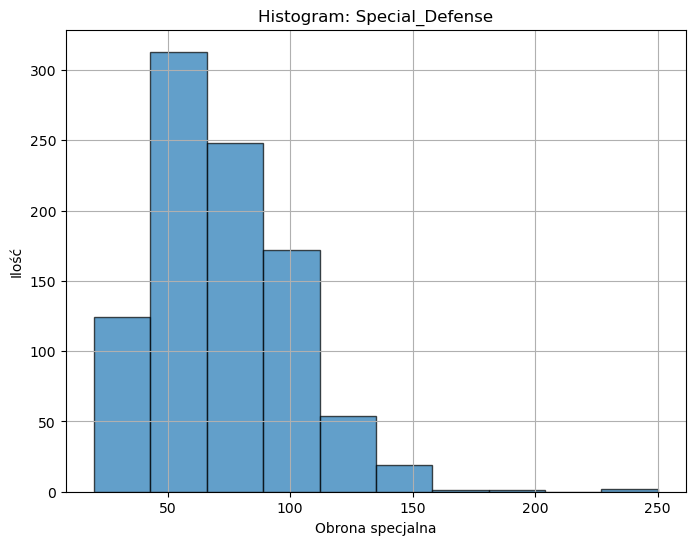

In [151]:
c = 'Special_Defense'
create_histogram(df_clear, c, captions[c])

`Special_Defense` - rozkład podobny jak `Special_Attack`, większość pokemonów ma wartości mniejsze

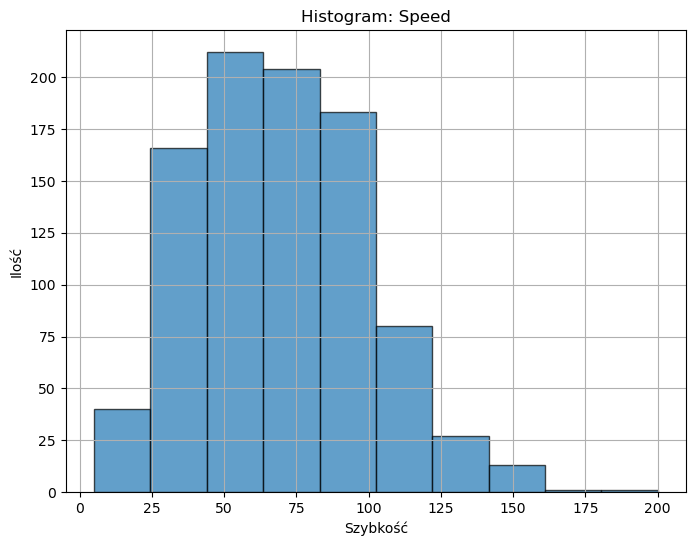

In [152]:
c = 'Speed'
create_histogram(df_clear, c, captions[c])

`Speed` - maksymalna wartość szybkości to `200`, którą ma mniej niż 10 pokemonów, znaczna większość pokemonów 
posiada wartości prędkości mniejsze od 100

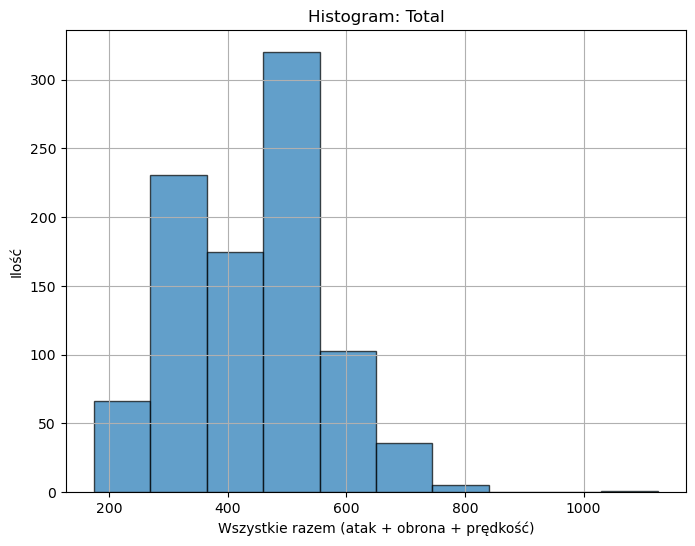

In [155]:
c = 'Total'
create_histogram(df_clear, c, captions[c])

`Total` - jest to suma poprzednich wartości (`Attack`, `Defence`, `Special_Attack`, `Special_Defence` oraz `Speed`); 
na wykresie widać, że jest bardzo mało pokemonów, które posiadają wartości tych cech większe niż `600`;
pokrywa się to z tym co zaobsrewowaliśmy na poprzednich wykresach

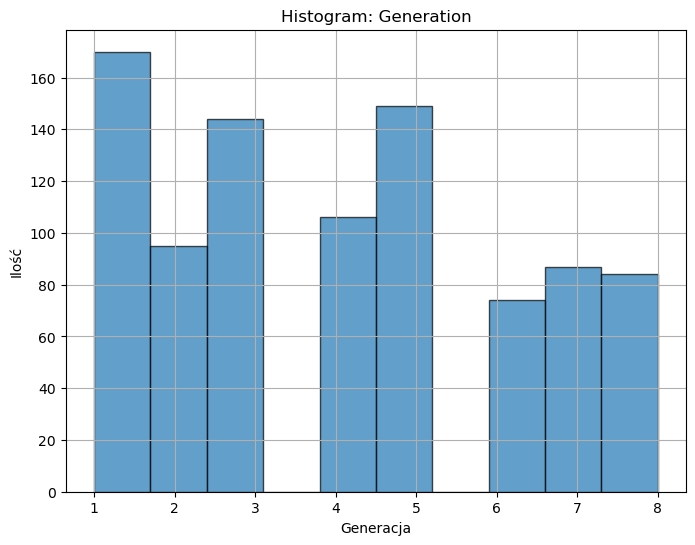

In [156]:
c = 'Generation'
create_histogram(df_clear, c, captions[c])

`Generation` - rozkład pokemonów na generacje jest dosyć zrównoważony, z każdej generacji mamy w zestawie średnio po `100+` pokemonów

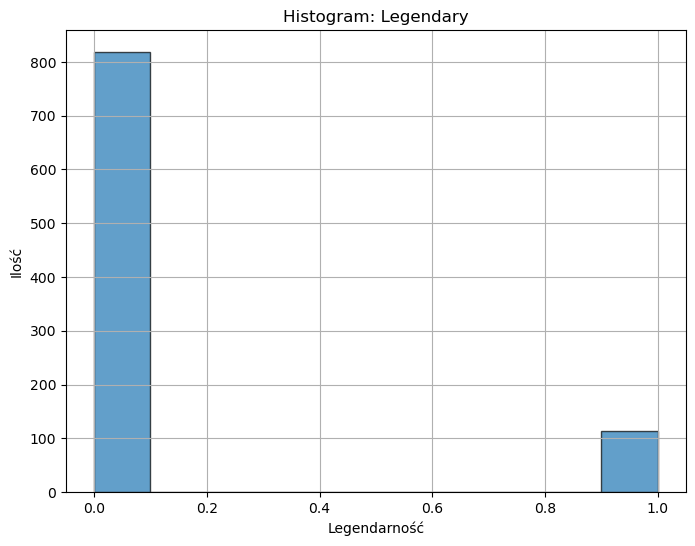

In [157]:
c = 'Legendary'
create_histogram(df_clear, c, captions[c])

`Legendary` - zdecydowana większość pokemonów nie jest pokemonem legendarnym -> być może ta dysproporcja będzie miała
negatywny wpływ na cały model, ponieważ przy trenowaniu modelu możemy dobrać dane treningowe w ten sposób, że model
nie będzie w stanie odpowienio dobrać klasy pokemona na danych testowych; 

--- 
#### Boxploty

In [138]:
def create_boxplot(df, c, cap, save_to_png=False):
    plt.figure(figsize=(6, 6))
    sns.boxplot(y=df[c], color='skyblue')
    plt.title(f"Boxplot: {c}")
    plt.ylabel(cap)
    plt.grid(True)
    if save_to_png:
        plt.savefig('./graphs/boxplot/' + c.lower() + '.png', dpi=300, bbox_inches="tight")
    plt.show()
    #plt.figure(figsize=(10, 10))
    #df.boxplot([c], figsize=(10, 10))

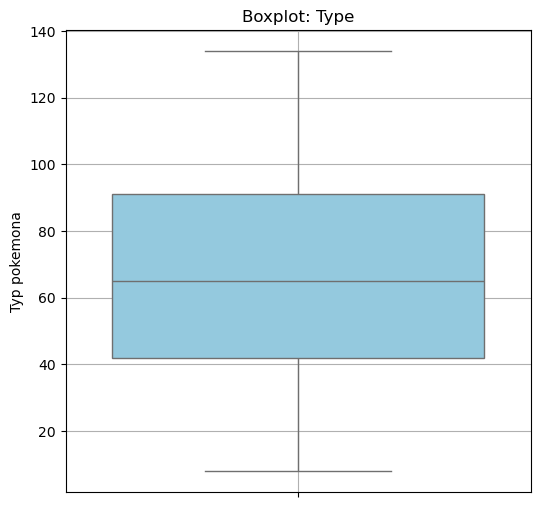

In [158]:
c = 'Type'
create_boxplot(df_clear, c, captions[c])

`Type`
- Dane mają równy rozkład z pewnym dodatnim nachyleniem (średnia wartość nie jest dokładnie na środku)
- Brak wartości odstających
- Większość wartości mieści się w przedziale od 40 do 90, z kilkoma sięgającymi 140.
- Wartości danych o umiarkowanej zmienności

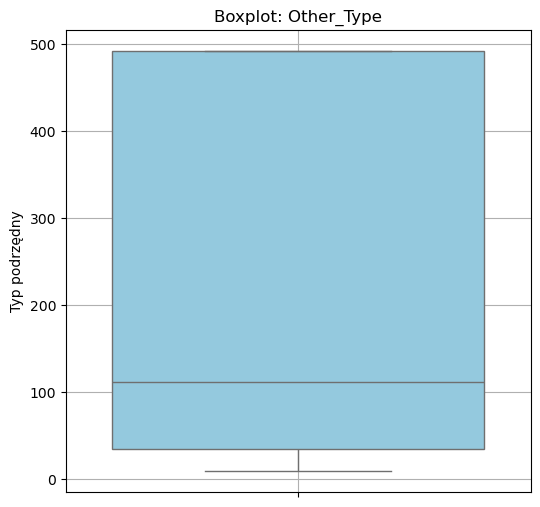

In [159]:
c = 'Other_Type'
create_boxplot(df_clear, c, captions[c])

`Other_Type`
- Prawoskośny rozkład - większość pokemonów nie ma typu podrzędnego
- Duża zmienność w zbiorze danych
- Sporo wartości małych
- Możliwe wartości skrajne, na wykresie nie widać wartości odstających

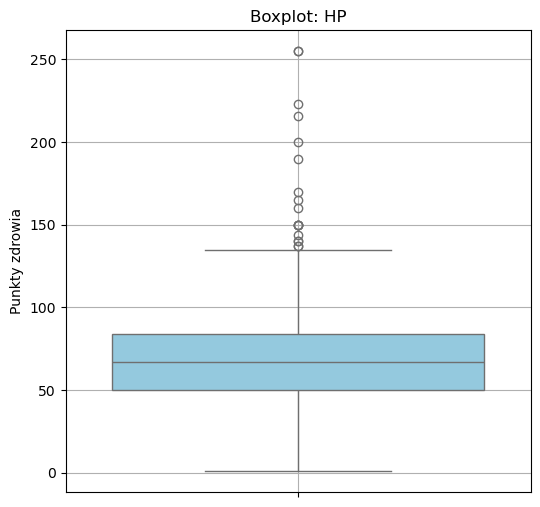

In [160]:
c = 'HP'
create_boxplot(df_clear, c, captions[c])

`HP`
- Większość wartości małych
- Duża liczba wartości odstających
- Umiarkowana zmienność w danych podstawowych, wartości skrajne mogą zaburzać rozkład
- Dane mogą wymagać transformacji

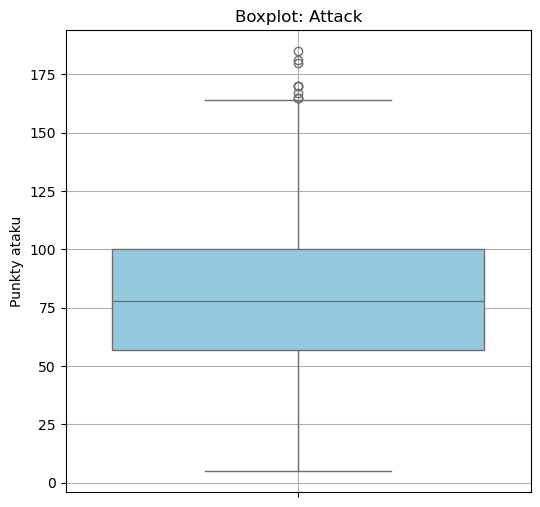

In [161]:
c = 'Attack'
create_boxplot(df_clear, c, captions[c])

`Attack`
- Podobnie jak `HP` ale z mniejszą ilością danych odstających 
- Kumulują się w przedziale `50 - 100`
- Mała zmienność danych

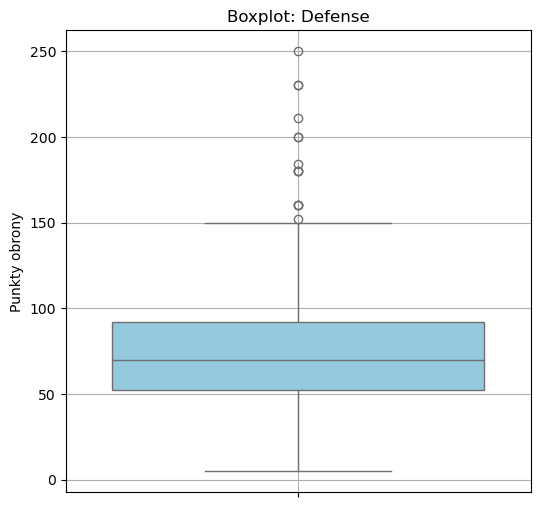

In [162]:
c = 'Defense'
create_boxplot(df_clear, c, captions[c])

`Defence`
- Bardzo podobnie jak w przypadku `HP`
- Zależność między punktami zdrowia a obroną

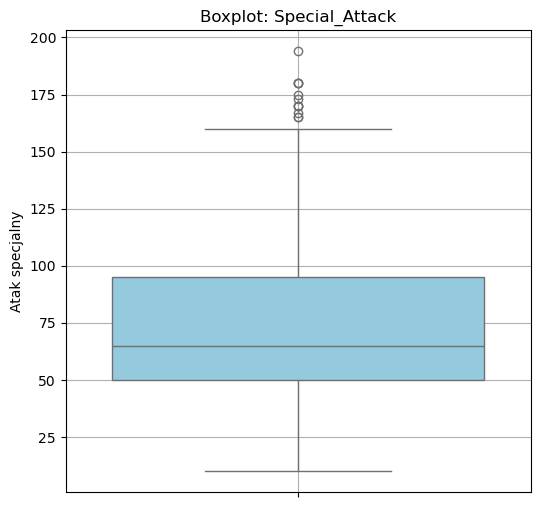

In [163]:
c = 'Special_Attack'
create_boxplot(df_clear, c, captions[c])       

`Special_Attack`
- Dane z dodatnim nachyleniem
- Kilka wartości odstających
- Większość wartości mieści się w przedziale od 50 do 90, z kilkoma sięgającymi 160.

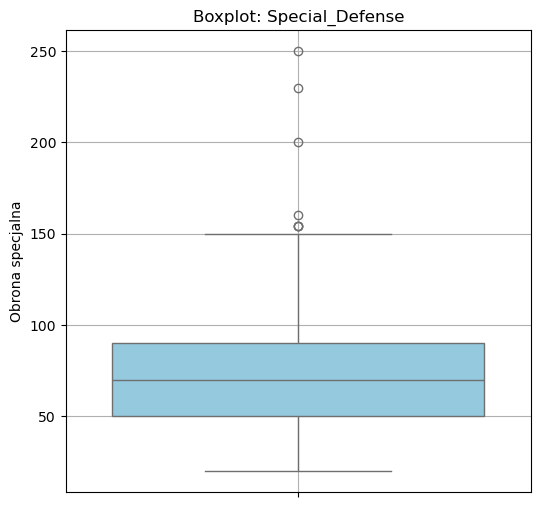

In [164]:
c = 'Special_Defense'
create_boxplot(df_clear, c, captions[c])

`Special_Defense`
- Mała zmienność danych
- Kilka wartości odstających
- Większość wartości mieści się w przedziale od 50 do 90, z kilkoma sięgającymi 150.

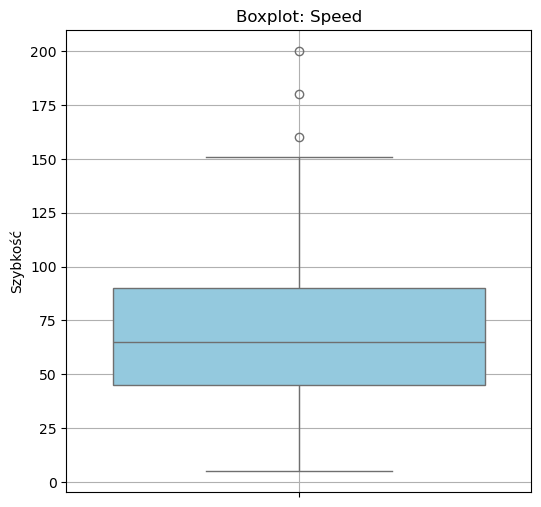

In [165]:
c = 'Speed'
create_boxplot(df_clear, c, captions[c])

`Speed`
- Dane z lekkim ujemnym nachyleniem
- Kilka wartości odstających
- Większość wartości mieści się w przedziale od 40 do 90

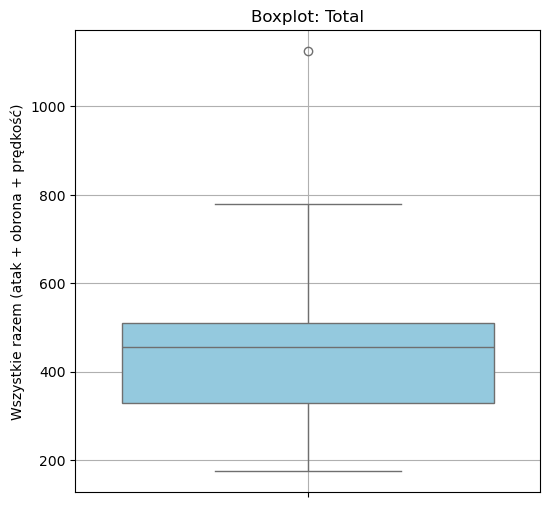

In [166]:
c = 'Total'
create_boxplot(df_clear, c, captions[c])

`Total`
- Dane z znacznym dodanim nachyleniem
- Kilka wartości odstających
- Więkość danych ma małe wartości (mniejsze od `600`)

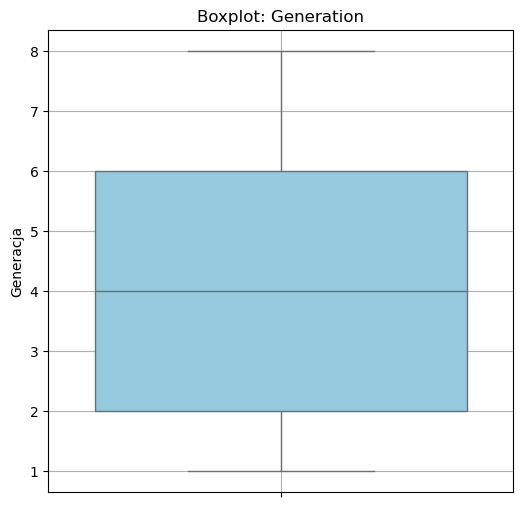

In [167]:
c = 'Generation'
create_boxplot(df_clear, c, captions[c])

`Generation`
- Brak wartości odstających
- Dane rozłożone równomiernie

---
#### Wizualizacja danych w oparciu o bardziej zaawansowany wykres

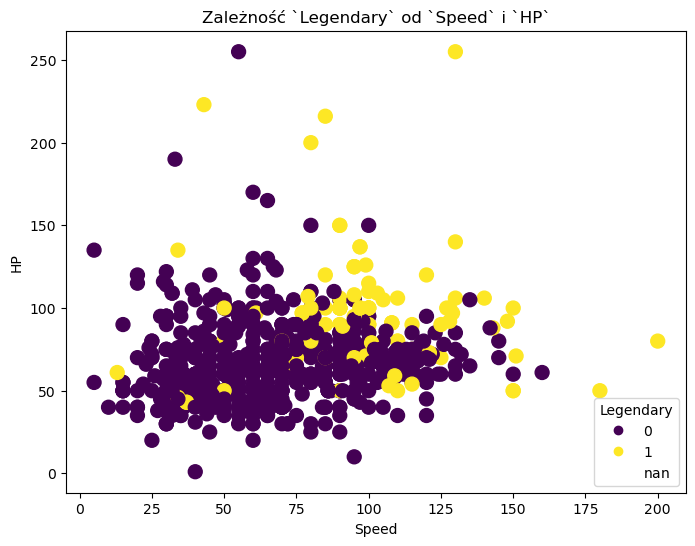

In [196]:
plt.figure(figsize=(8, 6))
c1 = 'Speed'
c2 = 'HP'
v = 'Legendary'

x1 = df[c1]
x2 = df[c2]
y  = df[v]

scatter = plt.scatter(x1, x2, c=y, s=100, label=y)
plt.xlabel(c1)
plt.ylabel(c2)
plt.title(f'Zależność `{v}` od `{c1}` i `{c2}`')
plt.legend(*scatter.legend_elements(), loc="lower right", title=v)
plt.show()

---
#### Analiza danych bazując na pandas

In [199]:
df_clear.describe()

Type  Other_Type          HP      Attack     Defense  \
count  942.000000  927.000000  924.000000  941.000000  926.000000   
mean    74.842887  254.729234   70.269481   80.411265   74.974082   
std     33.651568  224.070562   26.692744   32.118064   31.244621   
min      8.000000    9.000000    1.000000    5.000000    5.000000   
25%     42.000000   35.000000   50.000000   57.000000   52.250000   
50%     65.000000  112.000000   67.000000   78.000000   70.000000   
75%     91.000000  492.000000   84.000000  100.000000   91.750000   
max    134.000000  492.000000  255.000000  185.000000  250.000000   

       Special_Attack  Special_Defense       Speed        Total  Generation  \
count      912.000000       934.000000  927.000000   937.000000  909.000000   
mean        72.880482        72.293362   68.982740   438.614728    4.055006   
std         32.978255        28.131250   30.132066   121.502523    2.256476   
min         10.000000        20.000000    5.000000   175.000000    1.000000   
25%         50.000000        50.000000   45.000000   330.000000    2.000000   
50%         65.000000        70.000000   65.000000   455.000000    4.000000   
75%         95.000000        90.000000   90.000000   510.000000    6.000000   
max        194.000000       250.000000  200.000000  1125.000000    8.000000   

        Legendary  
count  932.000000  
mean     0.122318  
std      0.327828  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000

Zestaw danych po przetworzeniu (usunięciu zbędnych kolumn, dodaniu 10% wartości brakujących i zakodowaniu zmiennych kategorycznych)
składa się z 11 cech. Posiada 2 etykiety `0` oraz `1`. Wiersz `count` pokazuje ile jest rekordów, które posiadają poszczególne cechy (jeżeli `None`
to takie wiersze nie są wliczane). 

Pandas dostarcza nam również informacji o średniej wartości (`mean`), odchyleniu standardowym (`std`) oraz wartości maksymalnej (`max`) 
i minimalnej (`min`) dla danej cechy.

Dodatkowo możemy zobaczyć jak rozkładają się wartości dla poszczególnych zmiennych. 
- `25%` pokazuje, że 1/4 rekordów posiada daną wartość
- `50%` pokazuje, że 1/2 rekordów posiada daną wartość
- `75%` pokazuje, że 3/4 rekordów posiada daną wartość

In [222]:
df_clear.isna()

Type  Other_Type     HP  Attack  Defense  Special_Attack  \
0     False       False  False   False    False           False   
1     False       False  False   False    False           False   
2     False       False  False   False     True           False   
3     False       False  False   False    False           False   
4     False        True  False   False    False           False   
...     ...         ...    ...     ...      ...             ...   
1040  False        True   True   False    False           False   
1041  False       False  False   False    False           False   
1042  False       False  False   False    False           False   
1043  False       False  False   False    False           False   
1044  False       False  False    True    False            True   

      Special_Defense  Speed  Total  Generation  Legendary  
0               False  False  False       False      False  
1               False  False  False       False      False  
2               False  False  False       False       True  
3               False   True  False       False       True  
4               False  False  False        True       True  
...               ...    ...    ...         ...        ...  
1040            False  False  False       False       True  
1041            False   True  False       False       True  
1042            False  False  False       False      False  
1043            False  False  False       False      False  
1044            False  False  False       False      False  

[1045 rows x 11 columns]

Pakiet pandas pozwala wyświetlić informacje, które wiersze posiadają wartości `None` (w postaci tabeli jak powyżej)

Dodatkowo możemy za jego pomocą zliczyć wszystkie wartości danej cechy (np. dla `Type`):

In [223]:
df['Type'].value_counts(dropna=False)

Type
81.0     149
134.0    120
41.0     109
115.0    104
NaN      103
91.0      81
42.0      74
65.0      62
60.0      55
62.0      53
46.0      41
37.0      35
36.0      32
22.0      20
8.0        7
Name: count, dtype: int64

Jak widać typ pokemona może przyjmować wartości od 8 do 134 + wartość `NaN`, która oznacza brak danych dla rekordu (dodana przez nas
ręcznie). Takich wartości brakujących jest w tym zestawie 103 (ta wartość po ponownym uruchomieniu może się różnić, ponieważ
zestaw danych jest losowo zapełniany danymi pustymi)

---
#### Analiza pairplotów

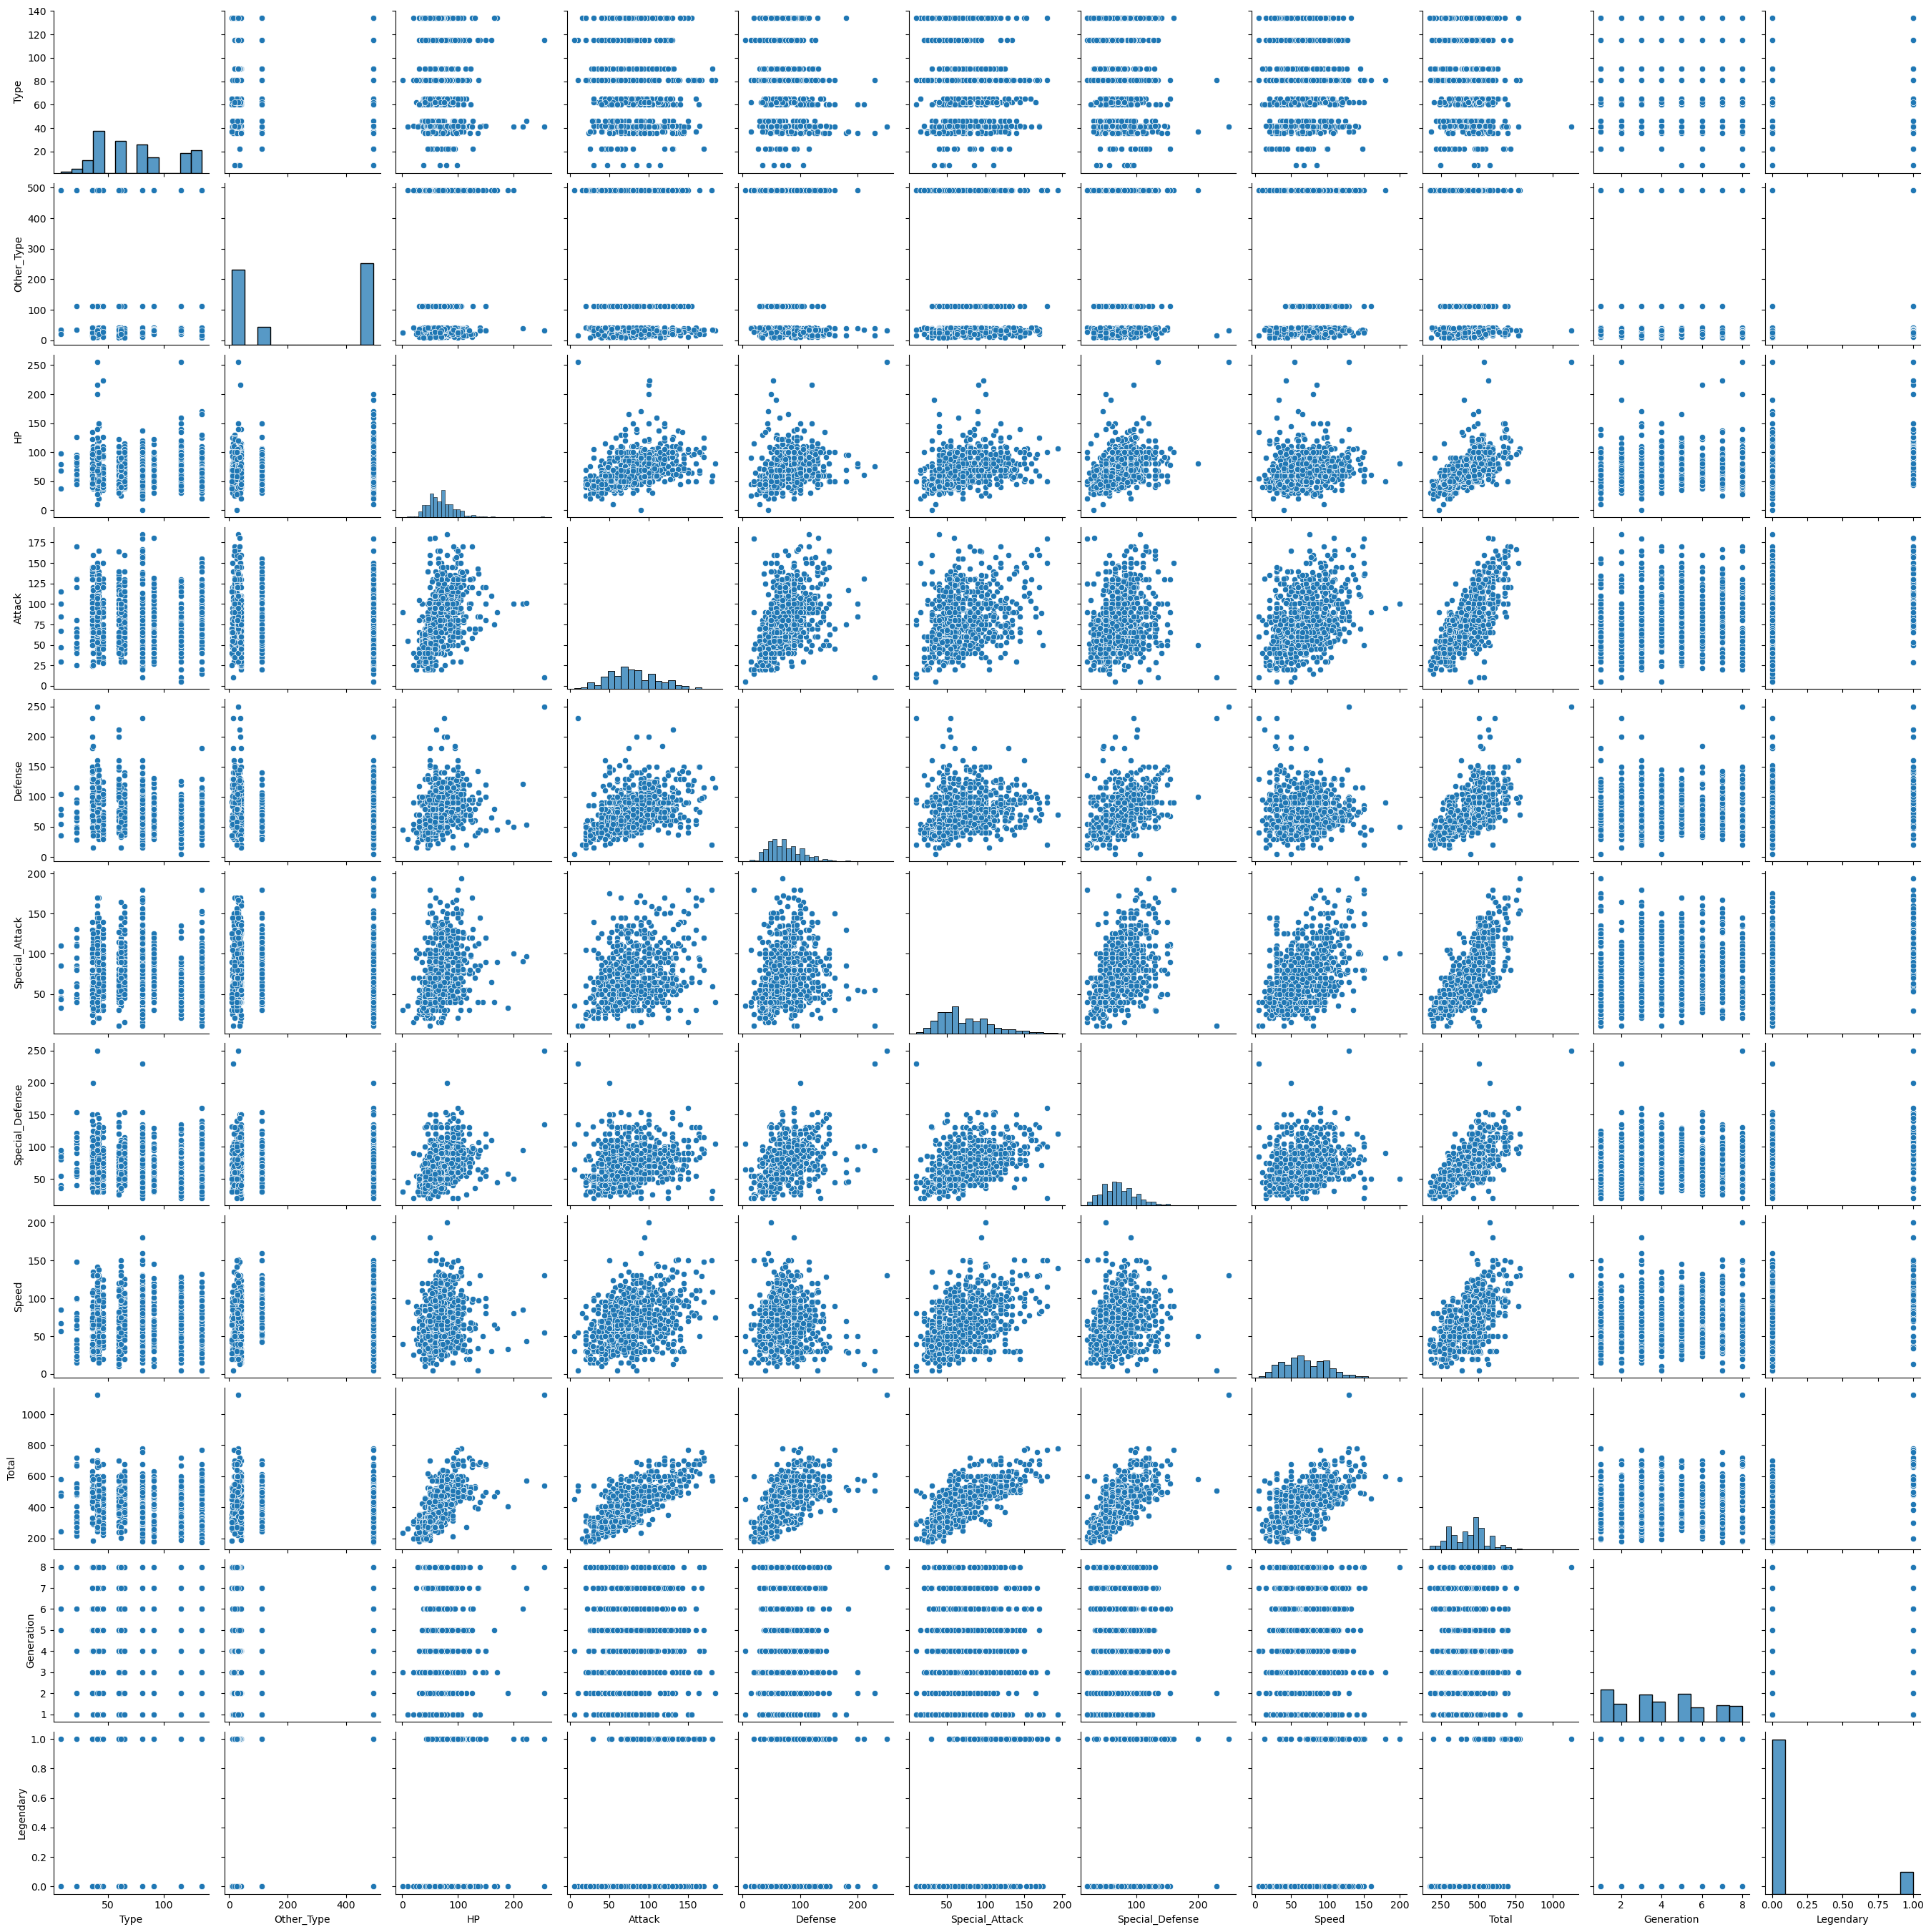

In [205]:
sns.pairplot(df_clear)
plt.show()  

In [203]:
def create_pairplot(df, cols):
    subset = df_clear[cols]
    sns.pairplot(subset)
    plt.show()  

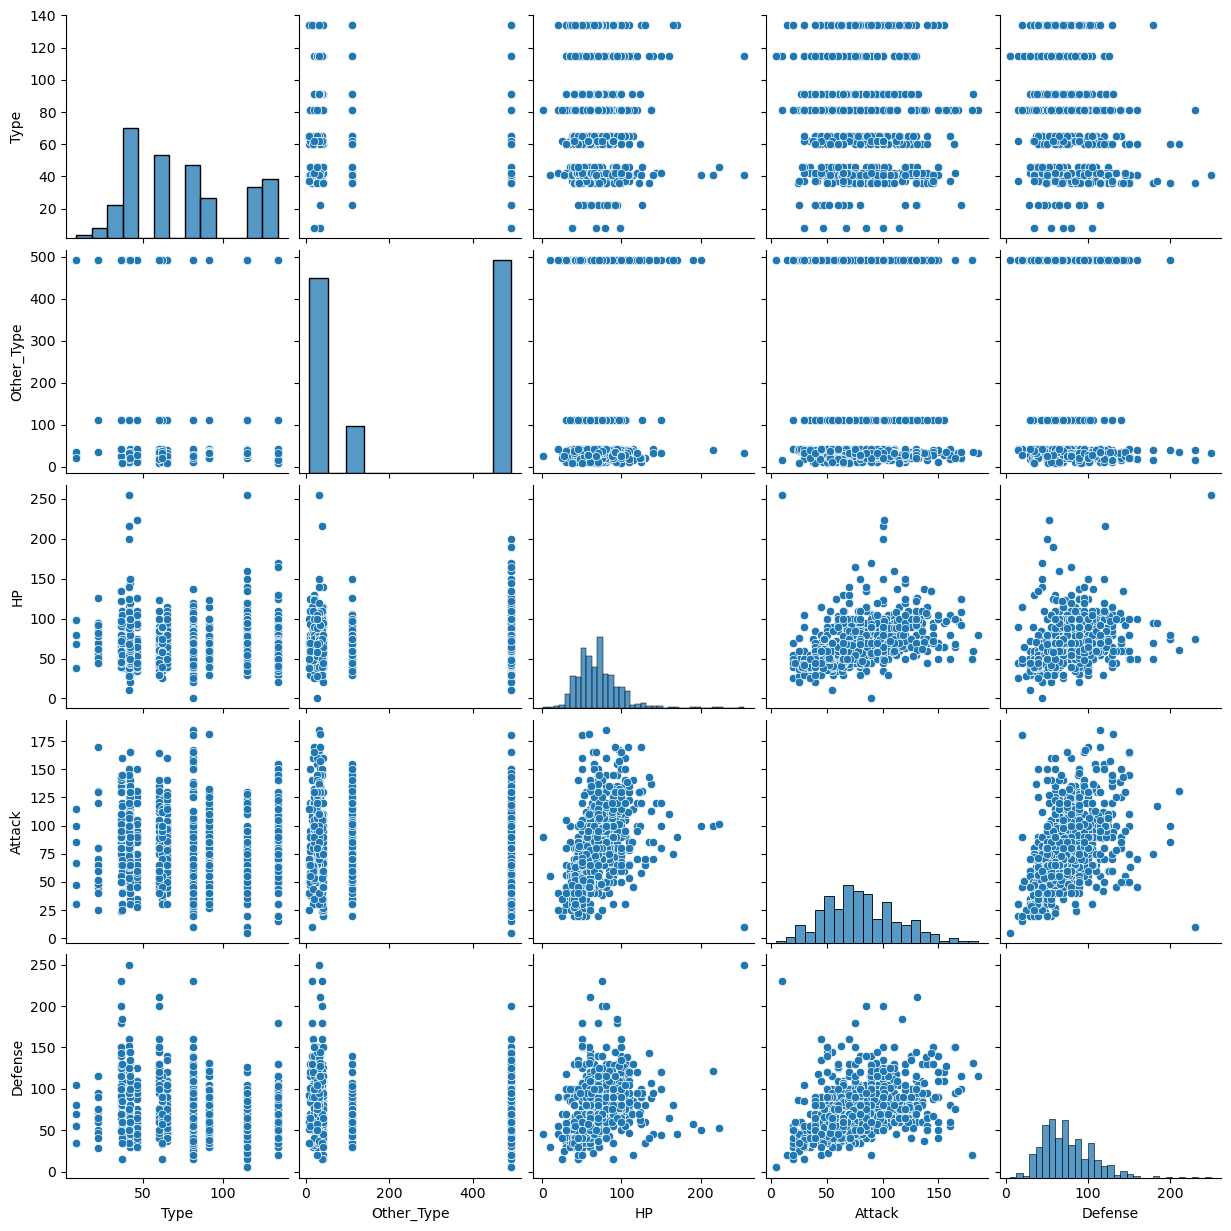

In [209]:
create_pairplot(df_clear, ['Type', 'Other_Type', 'HP', 'Attack', 'Defense'])

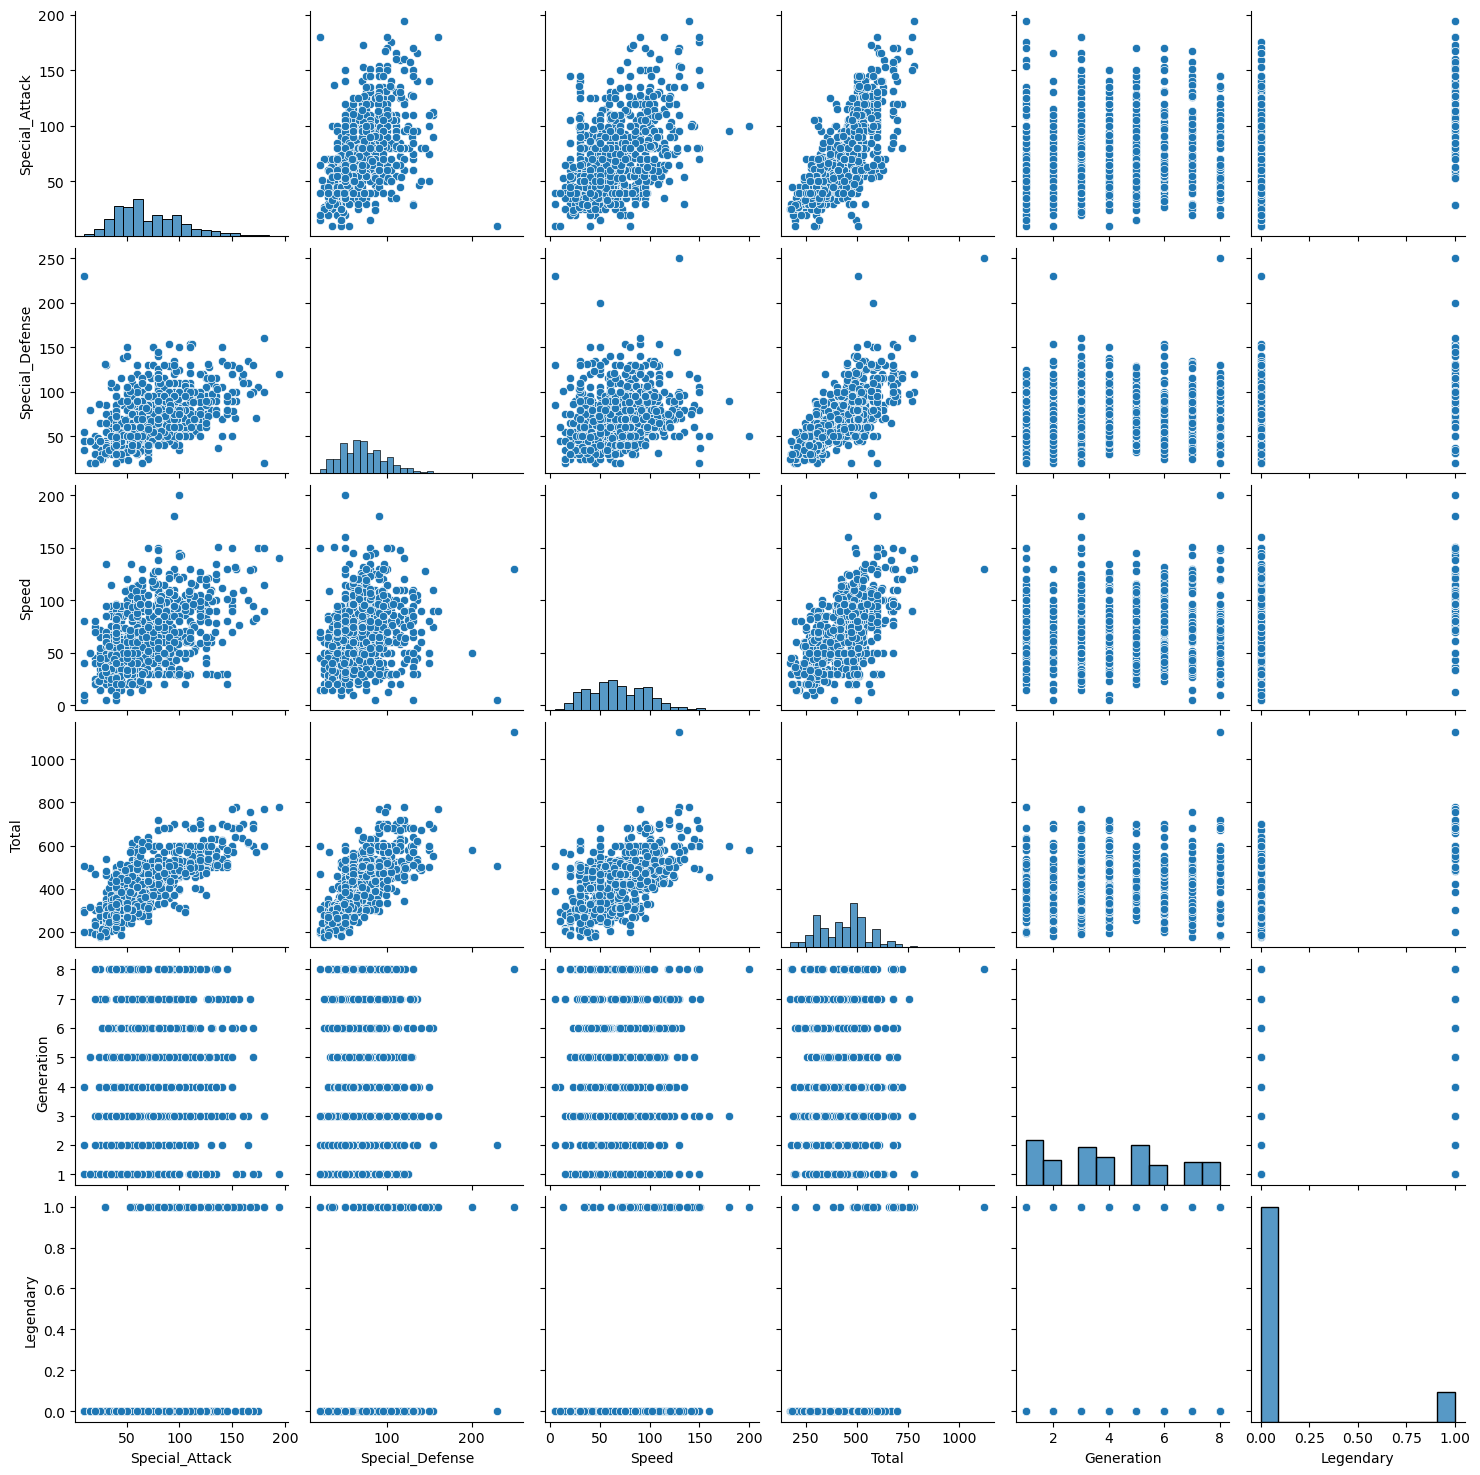

In [210]:
create_pairplot(df_clear, ['Special_Attack', 'Special_Defense', 'Speed', 'Total', 'Generation', 'Legendary'])

In [211]:
df_clear.columns

Index(['Type', 'Other_Type', 'HP', 'Attack', 'Defense', 'Special_Attack',
       'Special_Defense', 'Speed', 'Total', 'Generation', 'Legendary'],
      dtype='object')

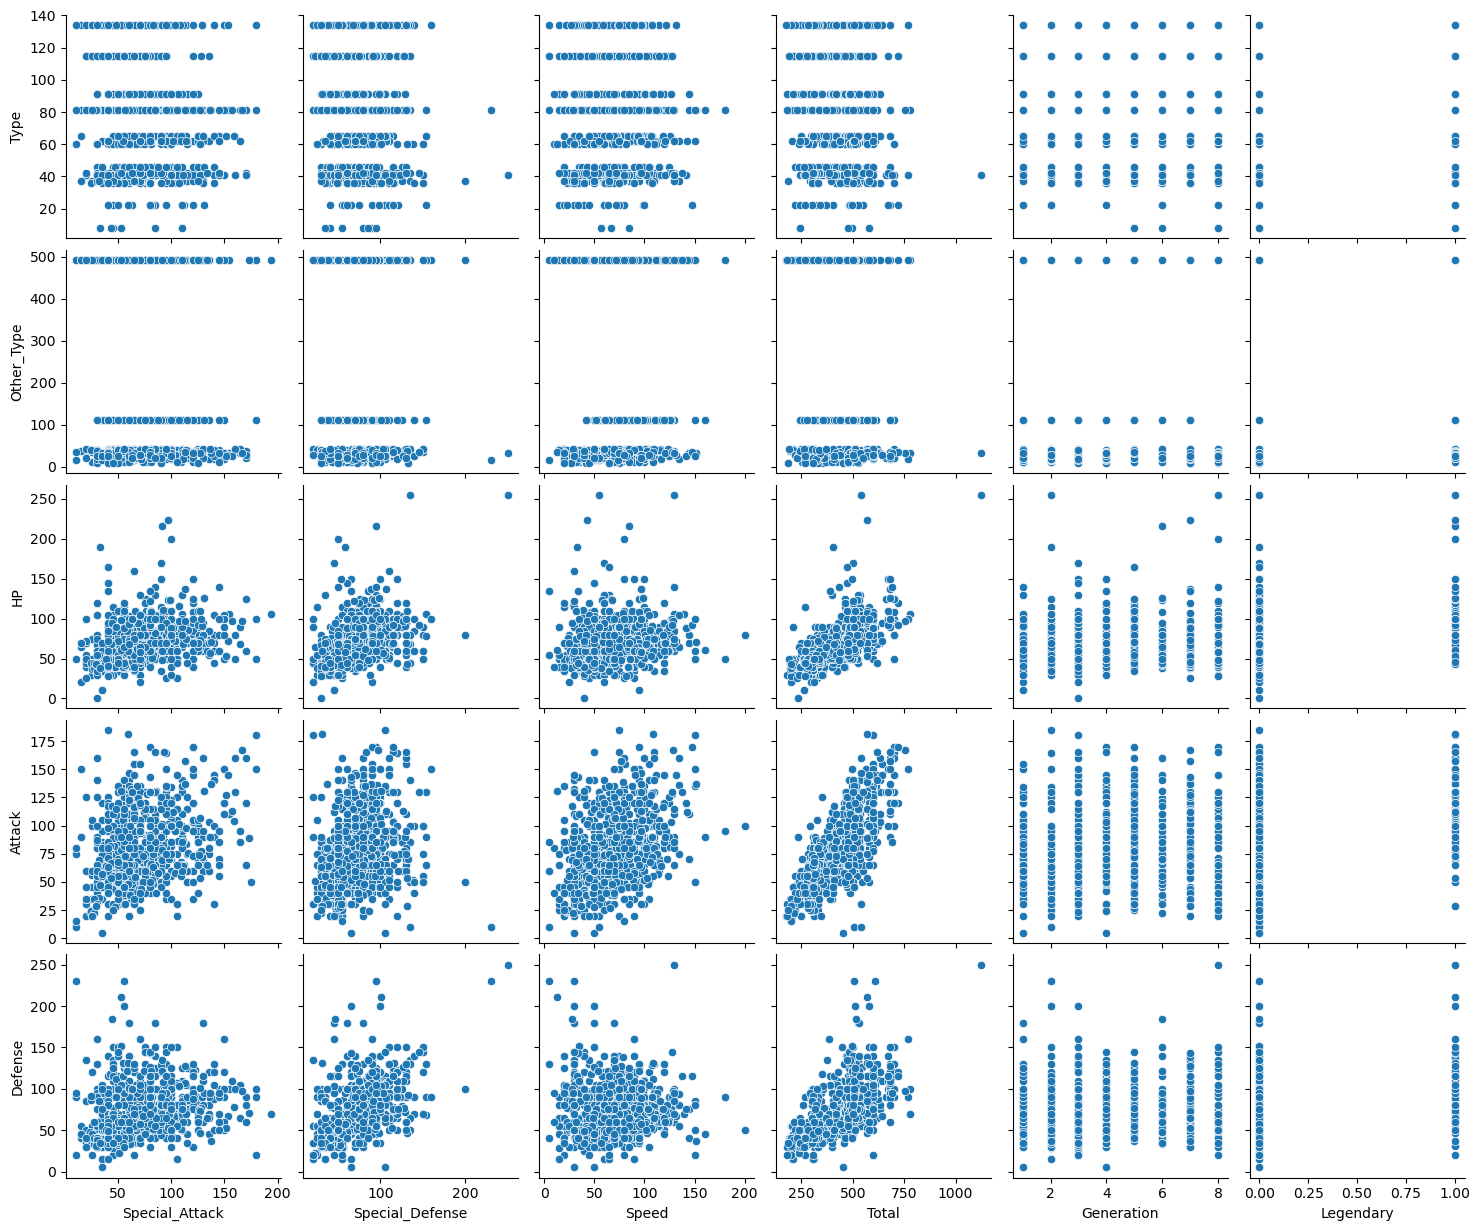

In [216]:
sns.pairplot(df_clear,  
    y_vars=['Type', 'Other_Type', 'HP', 'Attack', 'Defense'],
    x_vars=['Special_Attack', 'Special_Defense', 'Speed', 'Total', 'Generation', 'Legendary']
)

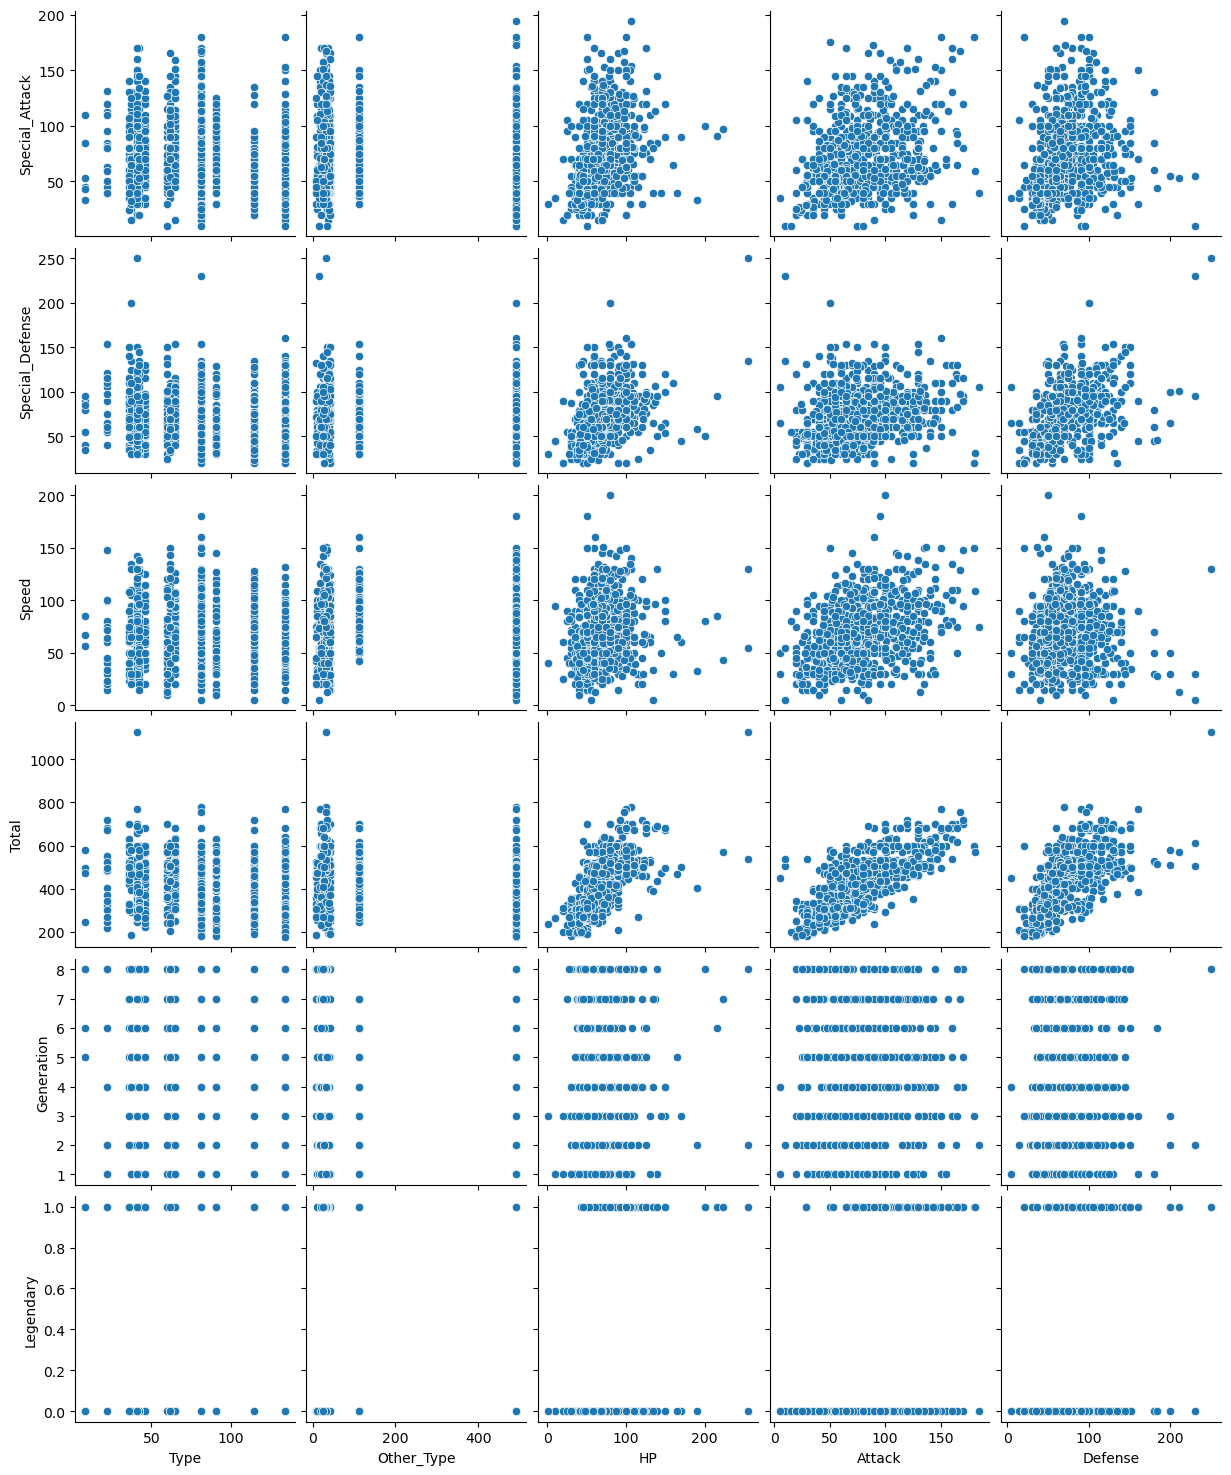

In [215]:
sns.pairplot(df_clear,  
    x_vars=['Type', 'Other_Type', 'HP', 'Attack', 'Defense'],
    y_vars=['Special_Attack', 'Special_Defense', 'Speed', 'Total', 'Generation', 'Legendary']
)

#### Co jeszcze jest do zrobienia z zajęć nr 1:
- [ ] analiza pairplotów

---
#### Zajęcia numer 2:
1. Dokładny opis przy wszystkich wykresach,
2. Analiza danych brakujących/błędnych (dwa proste sposoby + jeden "trudniejszy") = 3 różne zbiory danych jako output
3. Analiza danych odstających
4. Skalowanie danych (min/max + standaryzacja) dla każdego zbioru = 3 x 2 = 6 różnych zbiorow danych
5. Zastanowić się nad cechami, czy każda z nich jest ok, może jakoś je zestawić, pomyśleć o timestamp oraz danych kategorycznych
6. W razie potrzeby pozbyć się danych odstających (ostrożnie - patrz wykład)
7. Wgranie na delcie pliku z raportem